📊 Loading airline passenger data...
Data shape: (144, 1)


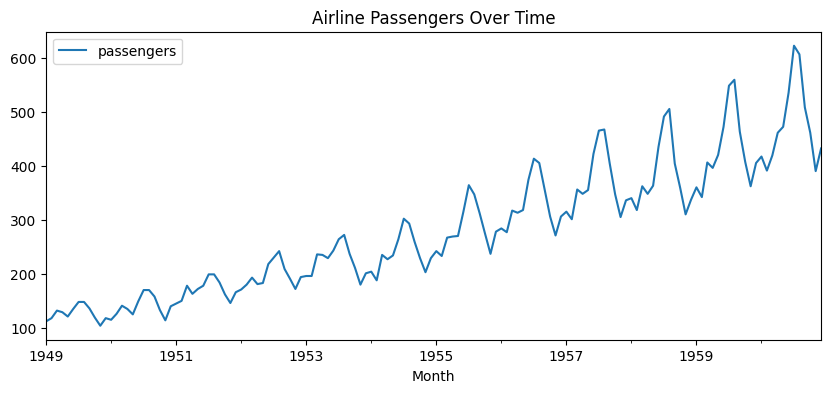

In [10]:
# 1. LOAD DATA 📊
print("📊 Loading airline passenger data...")
passengers = pd.read_csv('data/airline_passengers.csv')
passengers['Month'] = pd.to_datetime(passengers['Month'])
passengers.set_index('Month', inplace=True)

print(f"Data shape: {passengers.shape}")
passengers.plot(title='Airline Passengers Over Time', figsize=(10, 4))
plt.show()

In [11]:
# 2. PREPARE DATA 🔧
print("\n🔧 Preparing data for RNN...")

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(passengers[['passengers']])

# Create sequences
LOOK_BACK = 12  # Use 12 months to predict next month

def create_dataset(data, look_back=12):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, LOOK_BACK)

# Train/test split (80/20)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for RNN [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(f"Training data: {X_train.shape}")
print(f"Test data: {X_test.shape}")



🔧 Preparing data for RNN...
Training data: (105, 12, 1)
Test data: (27, 12, 1)


In [12]:
# 3. BUILD MODEL 🧠
print("\n🧠 Building RNN model...")

def make_rnn_model():
    """Simple RNN for airline passenger prediction"""
    model = Sequential()
    model.add(InputLayer(shape=(LOOK_BACK, 1)))
    model.add(SimpleRNN(50, activation="relu", return_sequences=True))
    model.add(SimpleRNN(30, activation="relu", return_sequences=False))
    model.add(Dense(1))
    return model

model = make_rnn_model()
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001), metrics=['mae'])

print("✅ Model created!")
print(f"Total parameters: {model.count_params():,}")


🧠 Building RNN model...
✅ Model created!
Total parameters: 5,061


In [13]:
# 4. TRAIN MODEL 🚀
print("\n🚀 Training model...")

history = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=50,  # Reduced for demo
    validation_data=(X_test, y_test),
    verbose=1
)

print("✅ Training complete!")



🚀 Training model...
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0450 - mae: 0.1633 - val_loss: 0.0251 - val_mae: 0.1358
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 - mae: 0.0815 - val_loss: 0.0135 - val_mae: 0.0960
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mae: 0.0494 - val_loss: 0.0210 - val_mae: 0.1122
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mae: 0.0470 - val_loss: 0.0106 - val_mae: 0.0824
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mae: 0.0447 - val_loss: 0.0105 - val_mae: 0.0862
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mae: 0.0484 - val_loss: 0.0082 - val_mae: 0.0759
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mae: 0.0408 - val_loss: 0.0074 - val_mae: 0.0720
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mae: 0.0388 - val_loss: 0.0067 - val_mae: 0.0673
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - m

In [14]:
# 5. MAKE PREDICTIONS 🔮
print("\n🔮 Making predictions...")

predictions = model.predict(X_test)

# Scale back to original values
predictions_original = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))


🔮 Making predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step



📈 Plotting results...


/var/folders/nd/ddfg6xk16ds2v0fm7r2ngggr0000gp/T/ipykernel_43943/124396610.py:12: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/halil.orhon/source/deep-learning-presentation/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


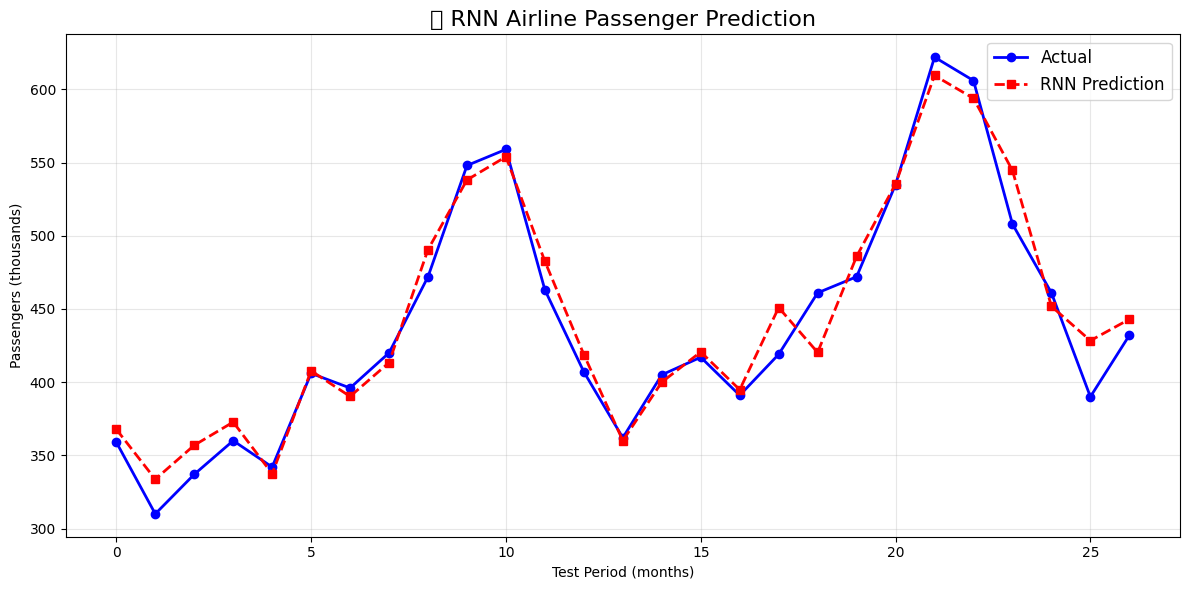


✅ Results:
📊 Mean Absolute Error: 13.7 thousand passengers
📈 Mean Absolute Percentage Error: 3.2%

🎉 Demo Complete!
What we just demonstrated:
• ✅ Loaded time series data (airline passengers)
• ✅ Preprocessed data into sequences
• ✅ Built Simple RNN model
• ✅ Trained on historical patterns
• ✅ Predicted future passenger numbers
• ✅ Visualized actual vs predicted results
🚀 This is the power of RNN for time series!


In [15]:
# 6. VISUALIZE RESULTS 📈
print("\n📈 Plotting results...")

plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual', color='blue', linewidth=2, marker='o')
plt.plot(predictions_original, label='RNN Prediction', color='red', linewidth=2, marker='s', linestyle='--')
plt.title('🚀 RNN Airline Passenger Prediction', fontsize=16)
plt.xlabel('Test Period (months)')
plt.ylabel('Passengers (thousands)')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate accuracy
mae = np.mean(np.abs(y_test_original - predictions_original))
mape = np.mean(np.abs((y_test_original - predictions_original) / y_test_original)) * 100

print(f"\n✅ Results:")
print(f"📊 Mean Absolute Error: {mae:.1f} thousand passengers")
print(f"📈 Mean Absolute Percentage Error: {mape:.1f}%")

print("\n🎉 Demo Complete!")
print("=" * 50)
print("What we just demonstrated:")
print("• ✅ Loaded time series data (airline passengers)")
print("• ✅ Preprocessed data into sequences")
print("• ✅ Built Simple RNN model")
print("• ✅ Trained on historical patterns")
print("• ✅ Predicted future passenger numbers")
print("• ✅ Visualized actual vs predicted results")
print("=" * 50)
print("🚀 This is the power of RNN for time series!")